In [1]:
#-------------------------------------------------------Liver Disease---------------------------------------------------------

import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
df = pd.read_excel("C:/Users/91801/Desktop/Retail_shop/Multiple Disease Prediction/dataset/liver_patient.xlsx")
df.drop_duplicates()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [3]:
#change the column name to smallcapse

df.columns = df.columns.str.lower()

In [4]:
#change columns name

df = df.rename({"dataset":"classify"},axis=1)

In [5]:
#change the value

df["classify"] = df["classify"].apply(lambda val: 1 if val == 1 else 0)

In [6]:
#descriptive analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         583 non-null    int64  
 1   gender                      583 non-null    object 
 2   total_bilirubin             583 non-null    float64
 3   direct_bilirubin            583 non-null    float64
 4   alkaline_phosphotase        583 non-null    int64  
 5   alamine_aminotransferase    583 non-null    int64  
 6   aspartate_aminotransferase  583 non-null    int64  
 7   total_protiens              583 non-null    float64
 8   albumin                     583 non-null    float64
 9   albumin_and_globulin_ratio  579 non-null    float64
 10  classify                    583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
df.describe()

,age,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_protiens,albumin,albumin_and_globulin_ratio,classify
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.713551
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [8]:
df.describe(include="object")

,gender
count,583
unique,2
top,Male
freq,441


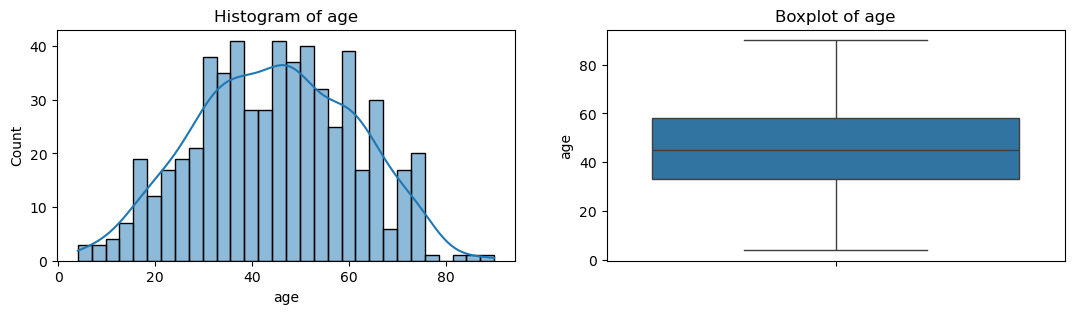

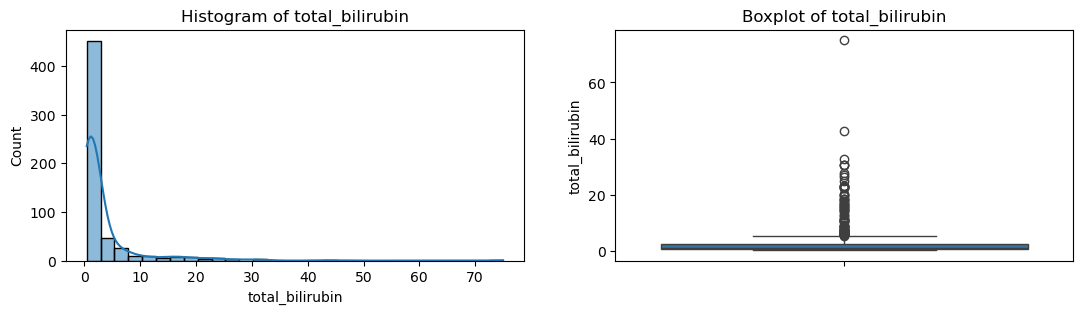

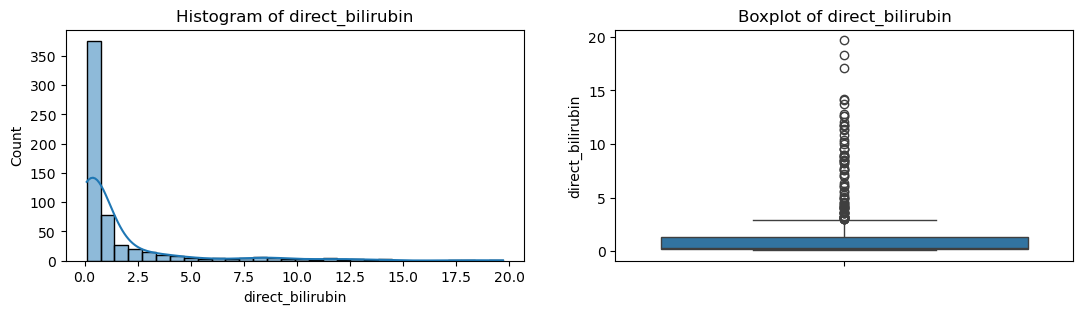

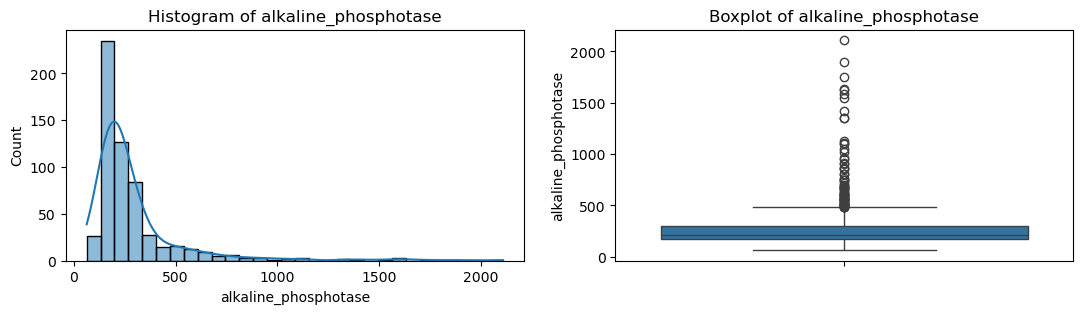

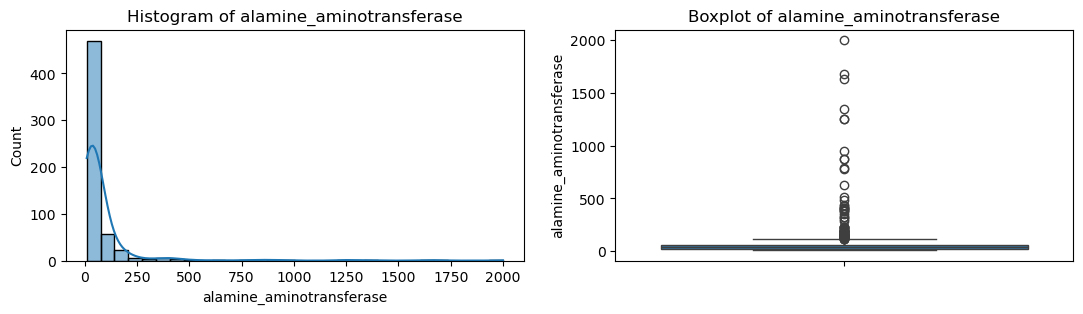

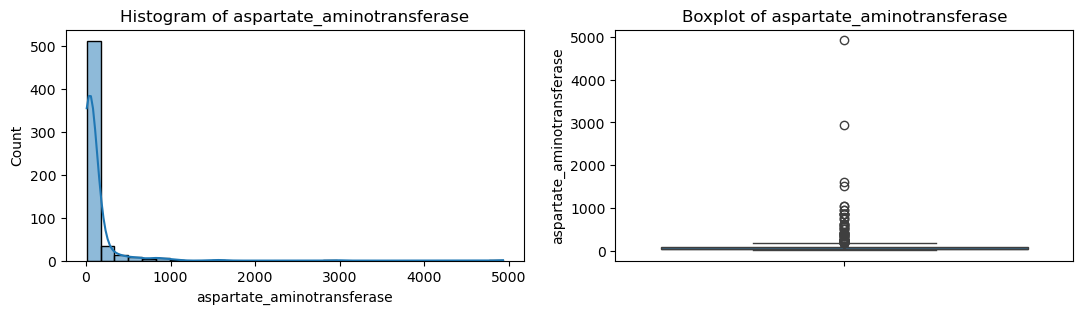

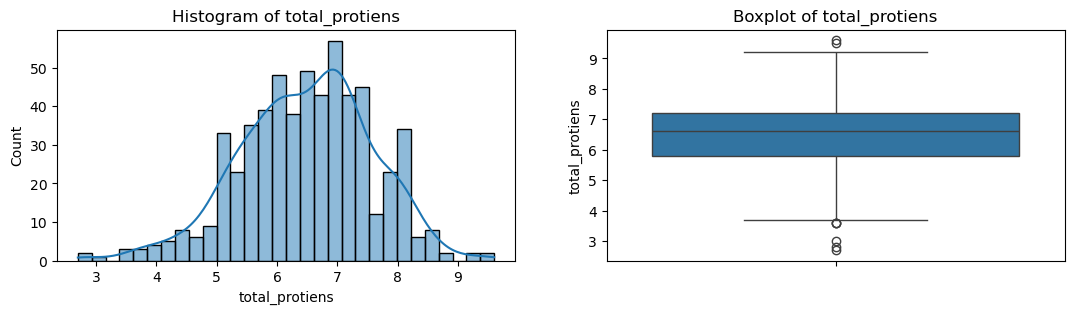

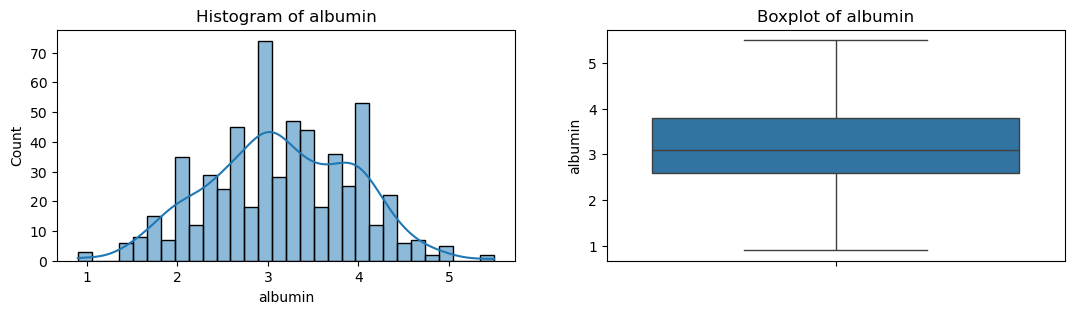

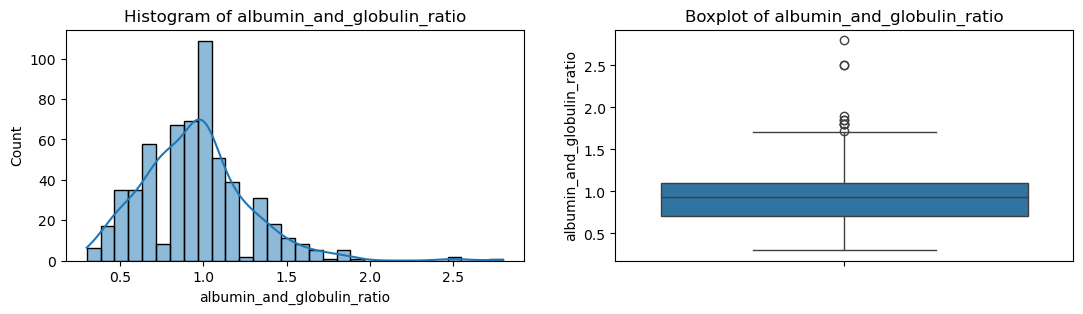

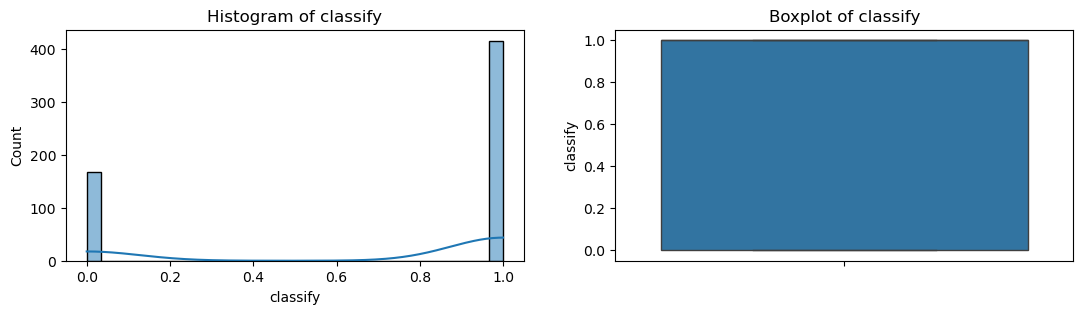

In [9]:
#----------------------------------------------EDA (Exploratory Data analysis)------------------------------------------------

num_features = df.select_dtypes(include="number")

for col in num_features:
    plt.figure(figsize=(13, 3))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Histogram of {col}")

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

    plt.show()

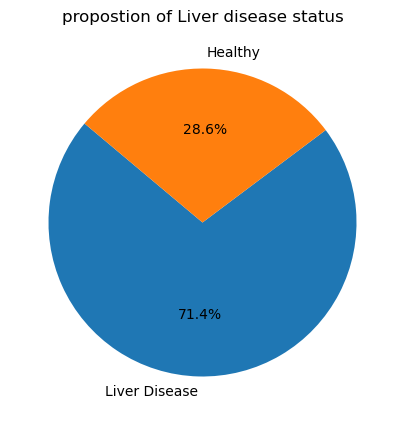

In [10]:
status_counts = df["classify"].value_counts()

labels = ["Liver Disease", "Healthy"]

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(status_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("propostion of Liver disease status")
plt.show()

[Text(0.5, 1.0, 'age with classify')]

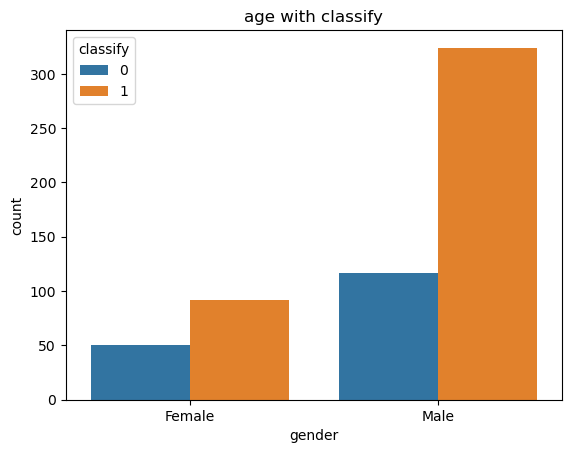

In [11]:
sns.countplot(data=df, x="gender", hue="classify").set(title="age with classify")

[Text(0.5, 1.0, 'total_bilirubin with classify')]

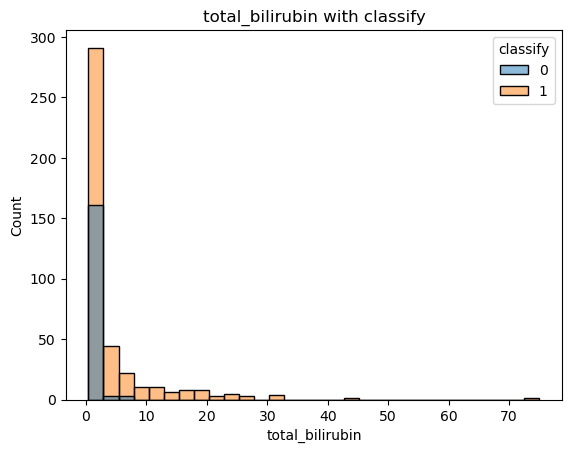

In [12]:
sns.histplot(data=df, x="total_bilirubin", hue="classify", bins=30).set(title="total_bilirubin with classify")

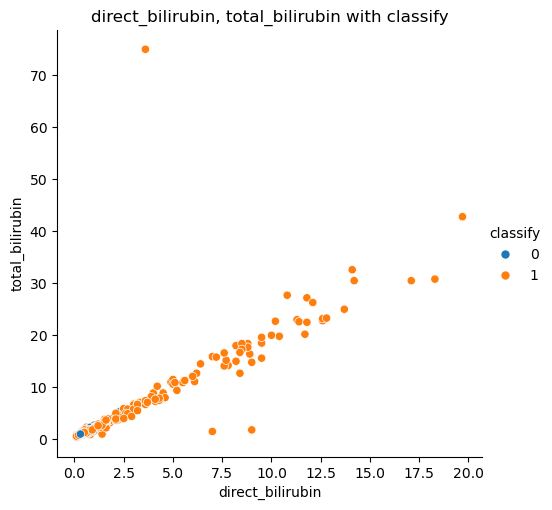

In [13]:
sns.relplot(data=df, x="direct_bilirubin", y="total_bilirubin", hue="classify").set(title="direct_bilirubin, total_bilirubin with classify")

[Text(0.5, 1.0, 'alkaline_phosphotase with classify')]

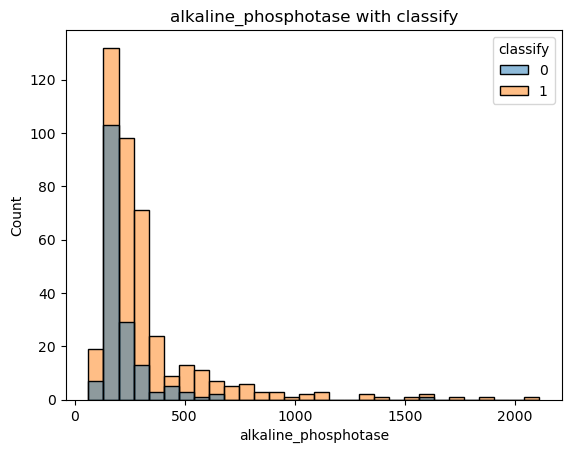

In [14]:
sns.histplot(data=df, x="alkaline_phosphotase", hue="classify", bins=30).set(title="alkaline_phosphotase with classify")

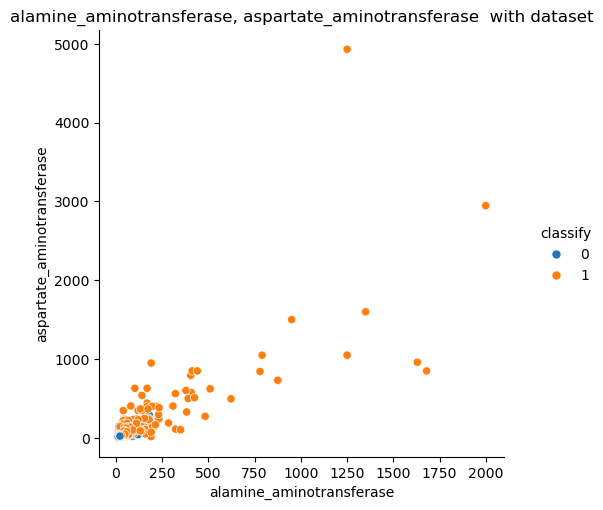

In [15]:
sns.relplot(data=df, x="alamine_aminotransferase", y="aspartate_aminotransferase", hue="classify").set(title="alamine_aminotransferase, aspartate_aminotransferase  with dataset")

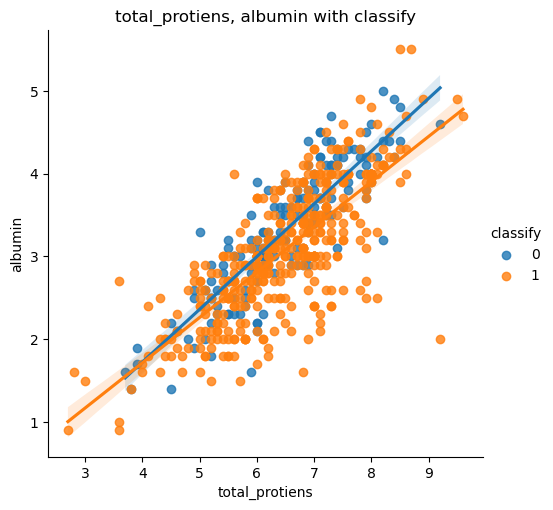

In [16]:
sns.lmplot(data=df, x="total_protiens", y="albumin", hue="classify").set(title="total_protiens, albumin with classify")

<AxesSubplot:>

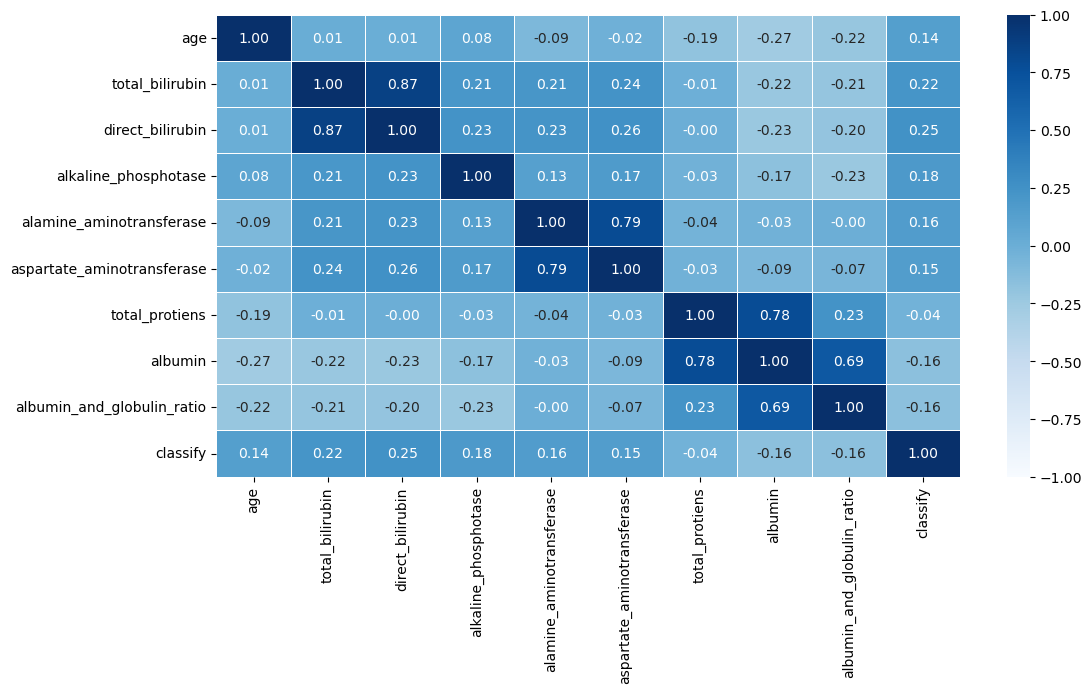

In [17]:
plt.figure(figsize=(12, 6))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap="Blues", fmt=".2f",vmin=-1, vmax=1, linewidths=0.5, linecolor="white")

In [18]:
#----------------------------------------------------data prproccessing------------------------------------------------------

#handle missing values :-
df.isnull().sum()

age                           0
gender                        0
total_bilirubin               0
direct_bilirubin              0
alkaline_phosphotase          0
alamine_aminotransferase      0
aspartate_aminotransferase    0
total_protiens                0
albumin                       0
albumin_and_globulin_ratio    4
classify                      0
dtype: int64

In [19]:
df.fillna(df.median(), inplace=True)

C:\Users\91801\AppData\Local\Temp\ipykernel_15760\3604797450.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(), inplace=True)


In [20]:
#feature selection :- 

x = df.drop(["gender" ,"classify"], axis=1)
y = df["classify"]

In [21]:
# handle class imbalance using smote :-

smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(x, y)

C:\Users\91801\anaconda3\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [22]:
#train test split :-

x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

In [23]:
# feature scaling

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [24]:
model = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100)

In [25]:
model.fit(x_train_scaled,y_train)

RandomForestClassifier(max_depth=10)

In [26]:
y_pred = model.predict(x_test_scaled)

In [27]:
#check metrics scores to evaluate :-

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

In [28]:
print(f"precision score : {precision:.2f} \nrecall score: {recall:.2f} \nf1 score : {f1:.2f}")
confusion

precision score : 0.88 
recall score: 0.77 
f1 score : 0.82


array([[75,  9],
       [19, 64]], dtype=int64)

In [29]:
#cross valid score :-

cv_scores = cross_val_score(model, x_train_scaled, y_train, cv=5)
print("Cross-validation mean score :", cv_scores.mean())

Cross-validation mean score : 0.7714285714285714


In [30]:
#dump and create file for model

joblib.dump(model, "liver_model.pkl")
print("Model saved successfully!")

Model saved successfully!


In [31]:
# Compute metrics
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"accuarcy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

accuarcy: 0.83
Precision: 0.88
Recall: 0.77
F1 Score: 0.82


In [32]:
#hyperparameter tunning :-

def train_and_evaluate(model, param_grid, model_name):
    grid_search = GridSearchCV(model, param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy', n_jobs=-1, verbose=2)
    grid_search.fit(x_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test_scaled)
    print(f"\n{model_name} Results:")
    print("Best Parameters:", grid_search.best_params_)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    return best_model

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model = train_and_evaluate(RandomForestClassifier(), rf_param_grid, "Random Forest")

Fitting 5 folds for each of 108 candidates, totalling 540 fits

Random Forest Results:
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.8263473053892215
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        84
           1       0.86      0.78      0.82        83

    accuracy                           0.83       167
   macro avg       0.83      0.83      0.83       167
weighted avg       0.83      0.83      0.83       167

Confusion Matrix:
 [[73 11]
 [18 65]]
